# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [73]:
df = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [75]:
df.shape

(12316, 32)

In [76]:
# View the data
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [77]:
df.tail()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [78]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
10376,17:43:00,Wednesday,18-30,Male,Junior high school,Employee,5-10yr,NaN,NaN,NaN,...,Turnover,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
215,7:35:00,Thursday,18-30,Male,High school,Employee,1-2yr,Automobile,Owner,1-2yr,...,Going straight,Passenger,Male,31-50,3,Employee,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
3193,12:30:00,Saturday,31-50,Male,Junior high school,Owner,Above 10yr,Lorry (11?40Q),Owner,Above 10yr,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10454,2:10:00,Saturday,Unknown,Female,Unknown,Employee,Below 1yr,Lorry (11?40Q),Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,2,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
647,17:50:00,Monday,18-30,Male,Elementary school,Employee,Above 10yr,Lorry (11?40Q),Governmental,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
5148,15:30:00,Tuesday,18-30,Male,Elementary school,Employee,5-10yr,Lorry (11?40Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving to the left,Serious Injury
10948,14:59:00,Wednesday,Over 51,Male,Junior high school,Employee,2-5yr,Other,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
7257,17:44:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,1-2yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
101,21:32:00,Thursday,31-50,Male,Elementary school,Employee,5-10yr,NaN,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury
7731,16:31:00,Thursday,Under 18,Male,Junior high school,Employee,Below 1yr,Public (12 seats),NaN,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [80]:
df.duplicated().sum()

0

In [79]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [81]:
#Drop all columns with large missing values.
df = df.drop(['Fitness_of_casuality', 'Work_of_casuality','Defect_of_vehicle','Service_year_of_vehicle'], axis=1)
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [82]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Area_accident_occured,239


In [83]:
#Convert all empty values ​​from NaN  that are object type using .mode
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].fillna(df[column].mode()[0])

In [84]:
from sklearn.preprocessing import MinMaxScaler
#Using the MinMaxScaler ensure that all multiple values ​​are in one range.
scaler = MinMaxScaler()
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [85]:
#Convert all empty values ​​from NaN hat are float type  using .mean
for column in df.columns:
    if df[column].dtype == 'float':
        df[column] = df[column].fillna(df[column].mean())

In [86]:

#  label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
                       'Educational_level', 'Type_of_vehicle', 'Owner_of_vehicle',
                       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
                       'Types_of_Junction',  'Light_conditions',
                       'Weather_conditions', 'Type_of_collision', 'Cause_of_accident',
                       'Accident_severity']

for col in categorical_columns:
  df[col] = label_encoder.fit_transform(df[col])

#  One-Hot Encoding

df = pd.get_dummies(df, columns=['Day_of_week', 'Sex_of_driver', 'Light_conditions'],
                    prefix=['Day', 'Sex', 'Light'])

##**Reformat data and ensure consistency**

In [87]:
df['Casualty_class'].value_counts()

,count
Casualty_class,
Driver or rider,4944
na,4443
Pedestrian,1649
Passenger,1280


In [88]:
df['Casualty_class'] = df['Casualty_class'].replace('na', np.nan)
df['Casualty_class'] = df['Casualty_class'].fillna('-1')
df['Casualty_class'] = df['Casualty_class'].replace('-1', np.nan)

In [89]:
df['Casualty_class'] = df['Casualty_class'].transform(lambda x: x.fillna(x.mode()[0]))

In [90]:

df['Sex_of_casualty'].value_counts()

,count
Sex_of_casualty,
Male,5253
na,4443
Female,2620


In [91]:
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na', np.nan)
df['Sex_of_casualty'] = df['Sex_of_casualty'].fillna('-1')
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('-1', np.nan)
df['Sex_of_casualty'].value_counts()

,count
Sex_of_casualty,
Male,5253
Female,2620


In [92]:
df['Sex_of_casualty'] = df['Sex_of_casualty'].transform(lambda x: x.fillna(x.mode()[0]))

In [93]:
df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1035
Over 51,994
5,244


In [94]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('Over 51', '51')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('Under 18', '18')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('31-50', '40')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('18-30', '20')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na', '-1')

df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
-1,4443
20,3145
40,2455
18,1035
51,994
5,244


In [95]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].astype(int)
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace(-1, np.nan)
print(df['Age_band_of_casualty'].dtype)
print(df['Age_band_of_casualty'].unique())

float64
[nan 40. 20. 18. 51.  5.]


In [96]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].transform(lambda x: x.fillna(x.mean()))

In [97]:
df['Casualty_severity'].value_counts()

,count
Casualty_severity,
3,7076
na,4443
2,771
1,26


In [98]:
df['Casualty_severity'] = df['Casualty_severity'].replace('na', np.nan)
df['Casualty_severity'] = df['Casualty_severity'].fillna('-1')
df['Casualty_severity'] = df['Casualty_severity'].astype(int)

df['Casualty_severity'] = df['Casualty_severity'].replace(-1, np.nan)
print(df['Casualty_severity'].dtype)
print(df['Casualty_severity'].unique())


float64
[nan  3.  2.  1.]


In [99]:
df['Casualty_severity'] = df['Casualty_severity'].transform(lambda x: x.fillna(x.mean()))

In [100]:
df['Age_band_of_driver'].value_counts()

,count
Age_band_of_driver,
0,4271
1,4087
2,1585
4,1548
3,825


In [101]:
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('31-50', '40')
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('18-30', '20')
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('Over 51', '52')
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('Under 18', '19')
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('Unknown', '-1')
df['Age_band_of_driver'] = df['Age_band_of_driver'].astype(int)
df['Age_band_of_driver'].value_counts()


,count
Age_band_of_driver,
0,4271
1,4087
2,1585
4,1548
3,825


In [102]:
df['Driving_experience'].value_counts()

,count
Driving_experience,
5-10yr,4192
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118
unknown,33


In [103]:
df['Driving_experience'] = df['Driving_experience'].replace('5-10yr', '7')
df['Driving_experience'] = df['Driving_experience'].replace('2-5yr', '3')
df['Driving_experience'] = df['Driving_experience'].replace('Above 10yr', '11')
df['Driving_experience'] = df['Driving_experience'].replace('1-2yr', '2')
df['Driving_experience'] = df['Driving_experience'].replace('Below 1yr', '0')
df['Driving_experience'] = df['Driving_experience'].replace('No Licence', '-1')
df['Driving_experience'] = df['Driving_experience'].replace('unknown', '-2')
df['Driving_experience'] = df['Driving_experience'].astype(int)
df['Driving_experience'].value_counts()

,count
Driving_experience,
7,4192
3,2613
11,2262
2,1756
0,1342
-1,118
-2,33


In [104]:
df

,Time,Age_band_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Day_4,Day_5,Day_6,Sex_0,Sex_1,Sex_2,Light_0,Light_1,Light_2,Light_3
0,17:02:00,0,0,Employee,2,0,3,9,2,5,...,False,False,False,False,True,False,False,False,False,True
1,17:02:00,1,4,Employee,11,11,3,6,4,5,...,False,False,False,False,True,False,False,False,False,True
2,17:02:00,0,4,Employee,2,5,3,1,6,5,...,False,False,False,False,True,False,False,False,False,True
3,1:06:00,0,4,Employee,7,11,0,6,6,6,...,False,False,False,False,True,False,True,False,False,False
4,1:06:00,0,4,Employee,3,0,3,4,6,5,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,1,4,Employee,3,4,3,5,4,5,...,False,False,True,False,True,False,False,False,False,True
12312,18:00:00,4,1,Employee,7,0,3,5,2,0,...,False,False,False,False,True,False,False,False,False,True
12313,13:55:00,2,4,Employee,7,1,3,5,2,7,...,False,False,False,False,True,False,False,False,False,True
12314,13:55:00,0,4,Employee,11,5,3,6,4,7,...,False,False,False,True,False,False,True,False,False,False


#I did tun the one hat encoder below with Data Visualization.

In [ ]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Number_of_vehicles_involved', 'Number_of_casualties']])
plt.show()
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

df = remove_outliers_iqr(df, 'Number_of_vehicles_involved')
df = remove_outliers_iqr(df, 'Number_of_casualties')

In [105]:
#Feature Engineering
#  Combine 'Hour' and 'Minute' into 'Time_of_Day'
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Time_of_Day'] = df['Hour'] * 60 + df['Minute']

# Drop original 'Time', 'Hour', and 'Minute' columns
df = df.drop(['Time', 'Hour', 'Minute'], axis=1)

<ipython-input-105-c3e8546a79d9>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour
<ipython-input-105-c3e8546a79d9>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df['Time']).dt.minute


In [106]:
#Convert from object to int to deal with it
numerical_cols = ['Age_band_of_driver', 'Driving_experience', 'Age_band_of_casualty',
                 'Casualty_severity']
df[numerical_cols] = df[numerical_cols].astype('int64')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age_band_of_driver           12316 non-null  int64  
 1   Educational_level            12316 non-null  int64  
 2   Vehicle_driver_relation      12316 non-null  object 
 3   Driving_experience           12316 non-null  int64  
 4   Type_of_vehicle              12316 non-null  int64  
 5   Owner_of_vehicle             12316 non-null  int64  
 6   Area_accident_occured        12316 non-null  int64  
 7   Lanes_or_Medians             12316 non-null  int64  
 8   Road_allignment              12316 non-null  int64  
 9   Types_of_Junction            12316 non-null  int64  
 10  Road_surface_type            12316 non-null  object 
 11  Road_surface_conditions      12316 non-null  object 
 12  Weather_conditions           12316 non-null  int64  
 13  Type_of_collisio

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: >

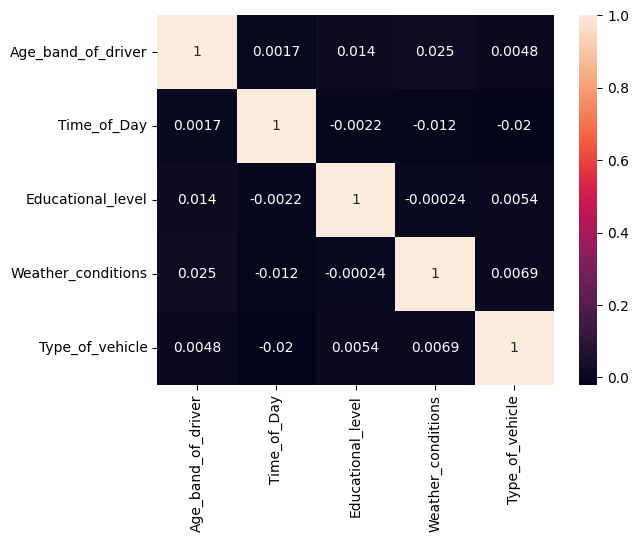

In [108]:
f = (
    df.loc[:,['Age_band_of_driver','Time_of_Day','Educational_level','Weather_conditions','Type_of_vehicle']]
   .dropna()
).corr()
sns.heatmap(f, annot=True)

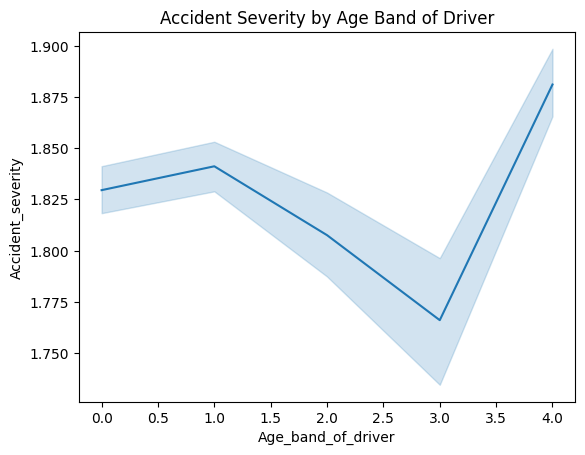

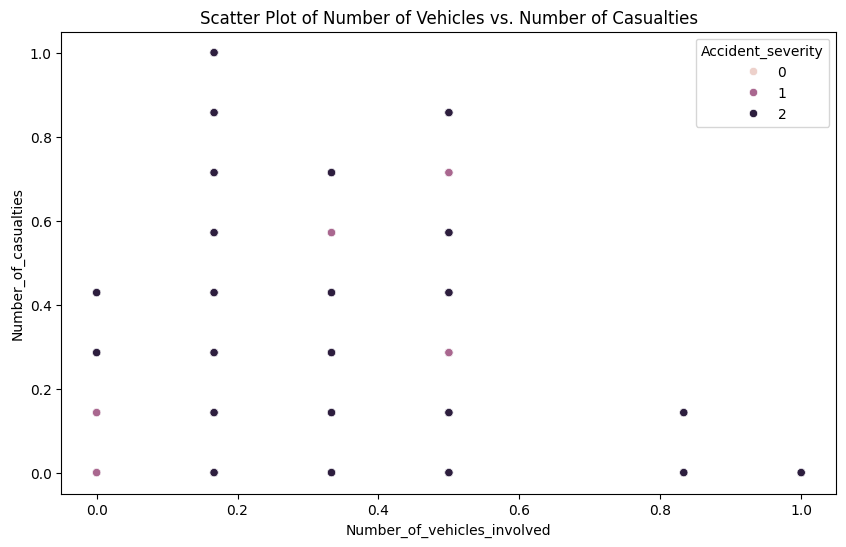

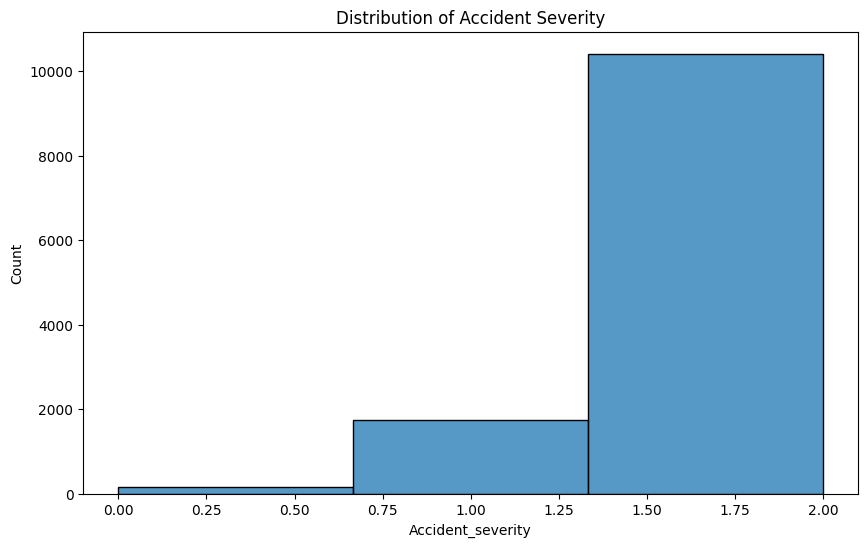

In [109]:
# Line plots
sns.lineplot(x='Age_band_of_driver', y='Accident_severity', data=df)
plt.title('Accident Severity by Age Band of Driver')
plt.show()

# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', hue='Accident_severity', data=df)
plt.title('Scatter Plot of Number of Vehicles vs. Number of Casualties')
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['Accident_severity'], bins=3)
plt.title('Distribution of Accident Severity')
plt.show()


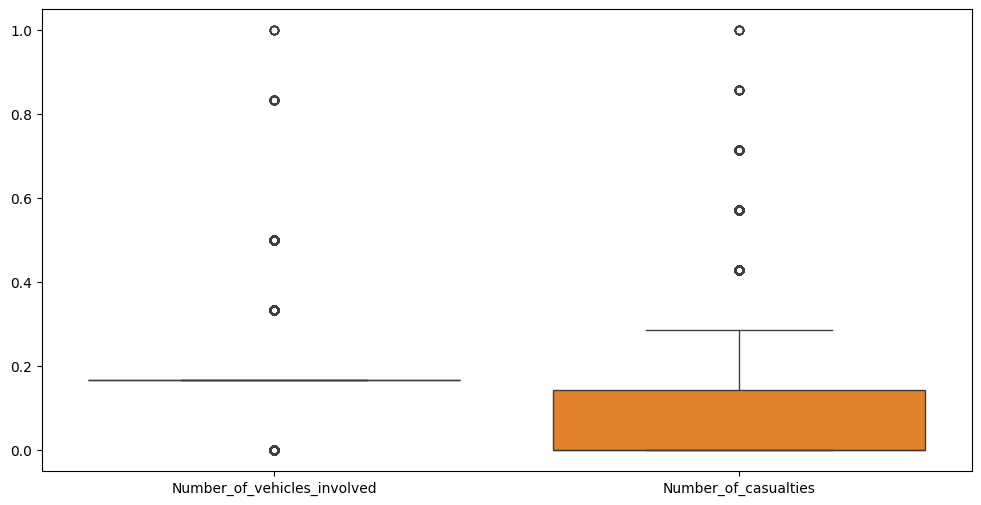

In [110]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Number_of_vehicles_involved', 'Number_of_casualties']])
plt.show()
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

df = remove_outliers_iqr(df, 'Number_of_vehicles_involved')
df = remove_outliers_iqr(df, 'Number_of_casualties')

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [111]:
# Select features
features = ['Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6',

            'Day_0', 'Age_band_of_driver', 'Educational_level',

            'Number_of_vehicles_involved', 'Number_of_casualties',

            'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',

            'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',

            'Weather_conditions', 'Type_of_collision', 'Cause_of_accident',

            'Time_of_Day', 'Sex_1', 'Sex_0', 'Light_0', 'Light_1',

            'Light_2', 'Driving_experience', 'Age_band_of_casualty',

            'Casualty_class', 'Casualty_severity']

X = df[features]
y = df['Accident_severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

le = LabelEncoder()

# Iterate over features and encode string columns
for col in X.columns:
    if X[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### **Logistic Regression**

In [112]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

####**DecisionTree Classifier**

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

**Support Vector Machine (SVM)**

In [114]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)


SVC()

**K-Neighbors Classifier**

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

# Logistic Regression

In [116]:
# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:\n", cm_logreg)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Precision and Recall
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
print("Logistic Regression Precision:", precision_logreg)
print("Logistic Regression Recall:", recall_logreg)

# F1 Score
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
print("Logistic Regression F1 Score:", f1_logreg)

Logistic Regression Confusion Matrix:
 [[   0    0   17]
 [   0    0  261]
 [   0    0 2105]]
Logistic Regression Accuracy: 0.8833403273185061
Logistic Regression Precision: 0.7802901338671654
Logistic Regression Recall: 0.8833403273185061
Logistic Regression F1 Score: 0.8286236136387948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [117]:
y_pred_dt = dt_classifier.predict(X_test)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:\n", cm_dt)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Precision and Recall
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)

# F1 Score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree F1 Score:", f1_dt)


Decision Tree Confusion Matrix:
 [[   0    4   13]
 [   5   40  216]
 [  22  287 1796]]
Decision Tree Accuracy: 0.7704574066302979
Decision Tree Precision: 0.7966822794453389
Decision Tree Recall: 0.7704574066302979
Decision Tree F1 Score: 0.7830715973635097


# Support Vector Machine (SVM)


In [118]:
y_pred_svm = svm_classifier.predict(X_test)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:\n", cm_svm)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Precision and Recall
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)

# F1 Score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("SVM F1 Score:", f1_svm)


SVM Confusion Matrix:
 [[   0    0   17]
 [   0    0  261]
 [   0    0 2105]]
SVM Accuracy: 0.8833403273185061
SVM Precision: 0.7802901338671654
SVM Recall: 0.8833403273185061
SVM F1 Score: 0.8286236136387948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Neighbors Classifier

In [119]:
y_pred_knn = knn_classifier.predict(X_test)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Confusion Matrix:\n", cm_knn)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Precision and Recall
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)

# F1 Score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN F1 Score:", f1_knn)


KNN Confusion Matrix:
 [[   2    0   15]
 [   0    3  258]
 [   1   47 2057]]
KNN Accuracy: 0.8652958455728074
KNN Precision: 0.7911691121601089
KNN Recall: 0.8652958455728074
KNN F1 Score: 0.8229450211216872


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

#Compare Metrics


---
As observed across different algorithms, the precision and recall measurements tend to be similar, but the overall accuracy shows some variation. In Logistic Regression and SVM, the accuracy is lower compared to precision and recall. For Decision Trees, the accuracy exhibits a higher error rate closer to 1. The K-Neighbors Classifier also demonstrates lower accuracy compared to precision and recall. These patterns provide insights into the strengths and limitations of each model, helping us select the most suitable approach based on our specific needs and requirements.

#Evaluate Trade-offs

---

Key Factors:
- **Computational Efficiency:** Logistic Regression and Decision Trees are more efficient, while SVM and KNN can be computationally expensive.
- **Ease of Implementation:** Logistic Regression and Decision Trees are easier to implement and interpret, while SVM and KNN can be more complex.
- **Model Interpretability:** Decision Trees and Logistic Regression offer better interpretability, while SVM and KNN are more challenging to interpret.


 Other Considerations:
- Decision Trees are prone to overfitting, requiring techniques like pruning.
- SVM can be sensitive to the choice of hyperparameters.
- KNN performance depends heavily on the distance metric and the number of neighbors.

#Justifying the Choice

---


The Decision Tree Classifier appears to be the most suitable model based on the performance metrics and trade-offs. It offers the highest accuracy while maintaining a reasonable balance in precision and recall. The interpretability of decision trees is also a key advantage. However, the potential for overfitting requires further investigation and mitigation strategies, such as pruning or ensemble methods.

# Model Limitations

---



1. **Data Imbalance**: Address class imbalance using techniques like oversampling or undersampling.

2. **Missing Values**: Explore advanced imputation methods to handle missing data.

3. **Outliers**: Investigate the impact of outliers and use robust techniques as needed.

4. **Feature Engineering**: Identify and create new features to better capture relevant information.

5. **Model Selection**: Consider experimenting with alternative algorithms, such as ensemble methods.

6. **Interpretability vs. Accuracy**: Balance the trade-off based on the application's requirements.

# Future Improvements

---



1. **Hyperparameter Tuning:** Use techniques like Grid Search, Randomized Search, or Bayesian Optimization to find optimal hyperparameters.

2. **Feature Engineering:** Create interaction terms, polynomial features, or leverage domain-specific knowledge.

3. **Ensemble Methods:** Explore techniques like Bagging or Boosting to combine multiple models.

4. **Cross-Validation:** Employ K-Fold or Stratified K-Fold to get a more robust performance estimate.

5. **Regularization:** Apply L1 or L2 regularization to prevent overfitting.

6. **Data Augmentation:** Use SMOTE to address class imbalance.

7. **Try Different Algorithms:** Experiment with other classification models, such as Naive Bayes or Neural Networks.

8. **Address Outliers:** Utilize robust scaling techniques to handle outliers.

9. **Feature Selection:** Apply methods like Recursive Feature Elimination or use feature importance scores.